In [354]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
from sklearn import linear_model
import seaborn as sns


# #Grabbing the database file and connecting
sqlite_file = 'lahmansbaseballdb.sqlite'
conn = sqlite3.connect(sqlite_file)

HOF_query = 'SELECT playerID,ballots,votes from HallOfFame WHERE votedBy="BBWAA" AND inducted="Y"'
# # Grabbing the yearID, teamID, and the total payroll (by grouping) 
# # from the Salary Table. We group by yearID and teamID to get one 
# # Salary entry per year per team.

batting_reg_query = "SELECT playerID,SUM(H) as total_hits, SUM(AB), SUM(HR),SUM([2B]), SUM([3B]),SUM(BB),SUM(HBP), SUM(SB) from Batting GROUP BY playerID"

fielding_reg_query = 'SELECT playerID, Pos, SUM(G), SUM(PO), SUM(A), SUM(E) from Fielding GROUP BY playerID'

# # Reading the SQL to create the 2 dataframes
reg_batting = pd.read_sql(batting_reg_query, conn)
reg_fielding = pd.read_sql(fielding_reg_query, conn)
hallOfFame = pd.read_sql(HOF_query,conn)

In [355]:
#reg_batting.join()

In [356]:
hallOfFame['Vote%'] = hallOfFame['votes']/hallOfFame['ballots'] * 100
hallOfFame.drop(['votes','ballots'],axis=1,inplace=True)
hallOfFame

,playerID,Vote%
0,cobbty01,98.230088
1,ruthba01,95.132743
2,wagneho01,95.132743
3,mathech01,90.707965
4,johnswa01,83.628319
...,...,...
118,rodriiv01,76.018100
119,jonesch06,97.156398
120,guerrvl01,92.890995
121,thomeji01,89.810427


In [357]:
reg_stats = pd.merge(reg_fielding,reg_batting, on=['playerID'])
reg_stats.columns = ['playerID','POS','GP','PO','A','E','H','AB','HR','DBL','TPL','BB','HBP','SB']
reg_stats

,playerID,POS,GP,PO,A,E,H,AB,HR,DBL,TPL,BB,HBP,SB
0,aardsda01,P,331,11,29,3.0,0,4,0,0,0,0,0.0,0.0
1,aaronha01,OF,3020,7436,429,144.0,3771,12364,755,624,98,1402,32.0,240.0
2,aaronto01,1B,387,1317,113,22.0,216,944,13,42,6,86,0.0,9.0
3,aasedo01,P,448,67,135,13.0,0,5,0,0,0,0,0.0,0.0
4,abadan01,1B,9,37,1,1.0,2,21,0,0,0,4,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19486,zupofr01,C,13,31,1,2.0,3,18,0,1,0,2,0.0,0.0
19487,zuvelpa01,SS,201,267,415,23.0,109,491,2,17,2,34,2.0,2.0
19488,zuverge01,P,265,45,145,7.0,21,142,0,2,1,9,0.0,0.0
19489,zwilldu01,OF,342,755,37,25.0,364,1280,30,76,15,128,4.0,46.0


In [358]:
jeter = reg_stats.loc[reg_stats['playerID'] == 'jeterde01']

In [359]:
reg_HOF_stats = pd.merge(hallOfFame,reg_stats,on='playerID')
reg_HOF_stats

,playerID,Vote%,POS,GP,PO,A,E,H,AB,HR,DBL,TPL,BB,HBP,SB
0,cobbty01,98.230088,OF,2954,6507,410,278.0,4189,11436,117,724,295,1249,94.0,896.0
1,ruthba01,95.132743,P,2436,4787,569,179.0,2873,8398,714,506,136,2062,43.0,123.0
2,wagneho01,95.132743,2B,2777,7940,6782,828.0,3420,10439,101,643,252,963,125.0,723.0
3,mathech01,90.707965,P,643,313,1506,57.0,362,1687,7,50,12,116,17.0,20.0
4,johnswa01,83.628319,P,815,292,1352,53.0,547,2324,24,94,41,110,13.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,rodriiv01,76.018100,C,2436,14922,1233,143.0,2844,9592,311,572,51,513,58.0,127.0
119,jonesch06,97.156398,SS,2405,1771,3581,243.0,2726,8984,468,549,38,1512,18.0,150.0
120,guerrvl01,92.890995,OF,1608,3169,126,125.0,2590,8155,449,477,46,737,103.0,181.0
121,thomeji01,89.810427,3B,1599,9450,1565,137.0,2328,8422,612,451,26,1747,69.0,19.0


In [360]:
reg_HOF_stats = reg_HOF_stats.append(jeter)

In [361]:
pd.set_option('display.max_rows', 100)

In [386]:
reg_HOF_stats = reg_HOF_stats[(reg_HOF_stats.POS != 'P')]
reg_HOF_stats.head(10)

,playerID,Vote%,POS,GP,E,H,AB,HR,SB,TB,OUTS,FieldPer,PredictedHits,ResidualHits,PredictedBases,ResidualBases
0,cobbty01,98.230088,OF,2954,278.0,4189,11436,117,896.0,7197.0,6917,96.136206,3416.655124,772.344876,6750.051386,446.948614
12,hornsro01,78.111588,SS,2164,500.0,2930,8173,301,135.0,5798.0,11337,95.775957,2458.995738,471.004262,5029.649568,768.350432
6,speaktr01,82.089552,OF,2717,224.0,3514,10195,117,432.0,6585.0,7397,97.060753,3052.433458,461.566542,6095.739815,489.260185
5,lajoina01,83.582090,1B,2441,518.0,3243,9590,82,380.0,5122.0,15211,96.706720,2874.871726,368.128274,5776.756334,-654.756334
99,gwynnto01,97.614679,OF,2326,62.0,3141,9288,135,319.0,5073.0,4672,98.690325,2786.237606,354.762394,5617.528216,-544.528216
11,keelewi01,75.547445,3B,2104,167.0,2932,8591,33,495.0,4215.0,3533,95.486486,2581.674752,350.325248,5250.038155,-1035.038155
38,musiast01,93.235294,OF,2907,142.0,3630,10972,475,78.0,7786.0,13257,98.940219,3280.475549,349.524451,6505.409509,1280.590491
10,collied01,77.737226,2B,2701,452.0,3315,9949,47,741.0,5844.0,14337,96.943674,2980.234803,334.765197,5966.037441,-122.037441
36,willite01,93.377483,OF,2152,113.0,2654,7706,521,24.0,6944.0,4300,97.439384,2321.935691,332.064309,4783.425955,2160.574045
9,sislege01,85.766423,1B,2036,274.0,2812,8267,102,375.0,4391.0,20487,98.680218,2486.583842,325.416158,5079.210638,-688.210638


In [363]:
reg_HOF_stats['SGL'] = reg_HOF_stats['H'] - reg_HOF_stats['DBL'] - reg_HOF_stats['TPL'] - reg_HOF_stats['HR']
reg_HOF_stats['TB'] = reg_HOF_stats['SGL'] + (2*reg_HOF_stats['DBL']) + (3*reg_HOF_stats['TPL'])+(4*reg_HOF_stats['HR']) + reg_HOF_stats['BB'] + reg_HOF_stats['HBP']
reg_HOF_stats.drop(['SGL','DBL','TPL','BB','HBP'],axis=1,inplace=True)

In [385]:
reg_HOF_stats['OUTS'] = reg_HOF_stats['PO'] + reg_HOF_stats['A']
reg_HOF_stats['FieldPer'] = reg_HOF_stats['OUTS']/ (reg_HOF_stats['OUTS'] + reg_HOF_stats['E']) * 100
reg_HOF_stats.drop(['PO','A'],axis=1,inplace=True)
reg_HOF_stats.head(10)

KeyError: 'PO'

Part 1: Lets check and see if Derek Jeter was the best Shortstop of all time
Must be evaluated on the four major categories, hitting for contact, hitting for power, fielding, and speed
It is very difficult to truly know which one of these categories is the most important, as they all have great impact on winning

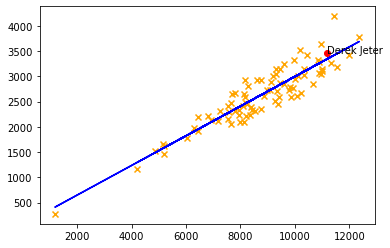

In [365]:
for k1,v1 in reg_HOF_stats.iterrows():
    if (v1['playerID'] == 'jeterde01'):
        plt.scatter(marker='o',x=v1['AB'],y=v1['H'],c='red')
        plt.annotate('Derek Jeter',(v1['AB'],v1['H']))
    else:
        plt.scatter(marker='x',x=v1['AB'],y=v1['H'],c='orange')

x = reg_HOF_stats['AB']
y = reg_HOF_stats['H']
m,b = np.polyfit(x,y,1)
plt.plot(x, m*x+b, '-', color='blue')

In [366]:
x = pd.DataFrame(reg_HOF_stats['AB'])
y = reg_HOF_stats['H']

reg = linear_model.LinearRegression().fit(x,y)
print(reg.coef_)

[0.29349046]


In [367]:
reg_HOF_stats['PredictedHits'] = reg.predict(x)
reg_HOF_stats['ResidualHits'] = reg_HOF_stats['H'] - reg_HOF_stats['PredictedHits']
reg_HOF_stats.sort_values(by='ResidualHits',ascending=False,inplace=True)
reg_HOF_stats.head(20)

,playerID,Vote%,POS,GP,E,H,AB,HR,SB,TB,OUTS,FieldPer,PredictedHits,ResidualHits
0,cobbty01,98.230088,OF,2954,278.0,4189,11436,117,896.0,7197.0,6917,96.136206,3416.655124,772.344876
12,hornsro01,78.111588,SS,2164,500.0,2930,8173,301,135.0,5798.0,11337,95.775957,2458.995738,471.004262
6,speaktr01,82.089552,OF,2717,224.0,3514,10195,117,432.0,6585.0,7397,97.060753,3052.433458,461.566542
5,lajoina01,83.582090,1B,2441,518.0,3243,9590,82,380.0,5122.0,15211,96.706720,2874.871726,368.128274
99,gwynnto01,97.614679,OF,2326,62.0,3141,9288,135,319.0,5073.0,4672,98.690325,2786.237606,354.762394
11,keelewi01,75.547445,3B,2104,167.0,2932,8591,33,495.0,4215.0,3533,95.486486,2581.674752,350.325248
38,musiast01,93.235294,OF,2907,142.0,3630,10972,475,78.0,7786.0,13257,98.940219,3280.475549,349.524451
10,collied01,77.737226,2B,2701,452.0,3315,9949,47,741.0,5844.0,14337,96.943674,2980.234803,334.765197
36,willite01,93.377483,OF,2152,113.0,2654,7706,521,24.0,6944.0,4300,97.439384,2321.935691,332.064309
9,sislege01,85.766423,1B,2036,274.0,2812,8267,102,375.0,4391.0,20487,98.680218,2486.583842,325.416158


<AxesSubplot:ylabel='ResidualHits'>

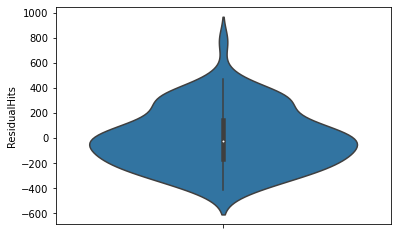

In [368]:
sns.violinplot(y=reg_HOF_stats['ResidualHits'])

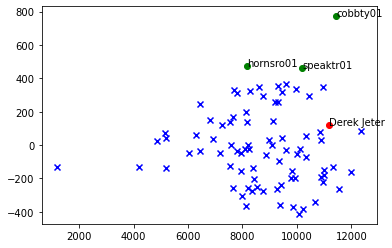

In [369]:
for k1,v1 in reg_HOF_stats.iterrows():
    if (v1['playerID'] == 'jeterde01'):
        plt.scatter(marker='o',x=v1['AB'],y=v1['ResidualHits'],c='red')
        plt.annotate('Derek Jeter',(v1['AB'],v1['ResidualHits']))
    elif (v1['ResidualHits'] > 400):
        plt.scatter(marker='o',x=v1['AB'],y=v1['ResidualHits'],c='green')
        plt.annotate(v1['playerID'],(v1['AB'],v1['ResidualHits']))
    else:
        plt.scatter(marker='x',x=v1['AB'],y=v1['ResidualHits'],c='blue')

cobbty01: Ty Cobb
hornsro01: Roger Horsnby
cobbTy01: Ty Cobb

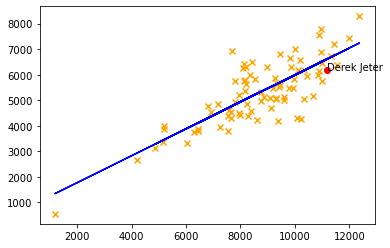

In [370]:
for k2,v2 in reg_HOF_stats.iterrows():
    if (v2['playerID'] == 'jeterde01'):
        plt.scatter(marker='o',x=v2['AB'],y=v2['TB'],c='red')
        plt.annotate('Derek Jeter',(v2['AB'],v2['TB']))
    else:
        plt.scatter(marker='x',x=v2['AB'],y=v2['TB'],c='orange')

x = reg_HOF_stats['AB']
y = reg_HOF_stats['TB']
m,b = np.polyfit(x,y,1)
plt.plot(x, m*x+b, '-', color='blue')

In [372]:
x2 = pd.DataFrame(reg_HOF_stats['AB'])
y2 = reg_HOF_stats['TB']

regBases = linear_model.LinearRegression().fit(x2,y2)
print(regBases.coef_)

[0.52724542]


In [373]:
reg_HOF_stats['PredictedBases'] = reg.predict(x2)
reg_HOF_stats['ResidualBases'] = reg_HOF_stats['TB'] - reg_HOF_stats['PredictedBases']

In [375]:
reg_HOF_stats.head(10)

,playerID,Vote%,POS,GP,E,H,AB,HR,SB,TB,OUTS,FieldPer,PredictedHits,ResidualHits,PredictedBases,ResidualBases
0,cobbty01,98.230088,OF,2954,278.0,4189,11436,117,896.0,7197.0,6917,96.136206,3416.655124,772.344876,6750.051386,446.948614
12,hornsro01,78.111588,SS,2164,500.0,2930,8173,301,135.0,5798.0,11337,95.775957,2458.995738,471.004262,5029.649568,768.350432
6,speaktr01,82.089552,OF,2717,224.0,3514,10195,117,432.0,6585.0,7397,97.060753,3052.433458,461.566542,6095.739815,489.260185
5,lajoina01,83.582090,1B,2441,518.0,3243,9590,82,380.0,5122.0,15211,96.706720,2874.871726,368.128274,5776.756334,-654.756334
99,gwynnto01,97.614679,OF,2326,62.0,3141,9288,135,319.0,5073.0,4672,98.690325,2786.237606,354.762394,5617.528216,-544.528216
11,keelewi01,75.547445,3B,2104,167.0,2932,8591,33,495.0,4215.0,3533,95.486486,2581.674752,350.325248,5250.038155,-1035.038155
38,musiast01,93.235294,OF,2907,142.0,3630,10972,475,78.0,7786.0,13257,98.940219,3280.475549,349.524451,6505.409509,1280.590491
10,collied01,77.737226,2B,2701,452.0,3315,9949,47,741.0,5844.0,14337,96.943674,2980.234803,334.765197,5966.037441,-122.037441
36,willite01,93.377483,OF,2152,113.0,2654,7706,521,24.0,6944.0,4300,97.439384,2321.935691,332.064309,4783.425955,2160.574045
9,sislege01,85.766423,1B,2036,274.0,2812,8267,102,375.0,4391.0,20487,98.680218,2486.583842,325.416158,5079.210638,-688.210638


<AxesSubplot:ylabel='ResidualBases'>

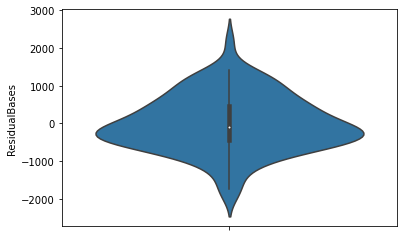

In [376]:
sns.violinplot(y=reg_HOF_stats['ResidualBases'])

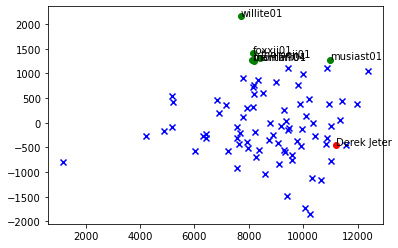

In [380]:
for k1,v1 in reg_HOF_stats.iterrows():
    if (v1['playerID'] == 'jeterde01'):
        plt.scatter(marker='o',x=v1['AB'],y=v1['ResidualBases'],c='red')
        plt.annotate('Derek Jeter',(v1['AB'],v1['ResidualBases']))
    elif (v1['ResidualBases'] > 1250):
        plt.scatter(marker='o',x=v1['AB'],y=v1['ResidualBases'],c='green')
        plt.annotate(v1['playerID'],(v1['AB'],v1['ResidualBases']))
    else:
        plt.scatter(marker='x',x=v1['AB'],y=v1['ResidualBases'],c='blue')

In [384]:
for i,r in reg_HOF_stats.iterrows():
    if r['playerID'] == 'jeterde01':
        print("Jeter's total hits residual was " +str(r['ResidualHits']) +" and his total Bases residual was " +str(r['ResidualBases']))

Jeter's total hits residual was 119.07607776933901 and his total Bases residual was -449.9852387506353


In [ ]:
Part 3: Comparing his fielding